In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import pywt
import warnings
import sklearn
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from keras_preprocessing.sequence import pad_sequences
import keras
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
%matplotlib inline
warnings.filterwarnings("ignore",category=np.VisibleDeprecationWarning)

In [2]:
dirD="./Datasets/setD/"
tempD=[]
for file in os.listdir(dirD):
    fl = dirD + file
    tempD.append(fl)
tempD = sorted(tempD)

dirE="./Datasets/setE/"
tempE=[]
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)

In [3]:
td=[]
st = 'A'
for i in range(len(tempD)):
    x = pd.read_table(tempD[i],header=None)
    x.columns=[st+str(i)]
    td.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

In [4]:
def table(table):
    big_table=None
    for tf in table:
        big_table=pd.concat([big_table,tf],axis=1)
    return big_table

In [5]:
bigD=table(td)
bigE=table(te)

head=list(bigE.columns.values)

In [6]:
len(bigD.columns)

100

In [7]:
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx

In [8]:
matD=creat_mat(bigD)
matE=creat_mat(bigE)

In [9]:
matD=np.nan_to_num(matD)
matE=np.nan_to_num(matE)

In [10]:
matD.shape,matE.shape

((4097, 100), (4097, 100))

In [11]:
matD

array([[  34.,   60.,   26., ...,   67.,    5.,  -45.],
       [  33.,   47.,   16., ...,   86.,    2.,  -53.],
       [  28.,   38.,   13., ...,   99.,   -6.,  -51.],
       ...,
       [  39.,  149.,  114., ...,   17.,   36.,  -26.],
       [  41.,  126.,   99., ...,   10.,   36.,  -14.],
       [   7.,   42., -130., ...,   26.,   -5.,  -28.]])

In [12]:
matE

array([[ 100.,  340., -310., ..., -438., -476.,   23.],
       [ 124.,  353.,   93., ..., -561., -518.,  144.],
       [ 153.,  400.,  494., ..., -622., -521.,  228.],
       ...,
       [  57.,  512., -721., ..., -118.,  246., -155.],
       [  95.,  130., -491., ..., -163.,  556.,    6.],
       [ 462.,  196.,  910., ...,  -56.,  276., -221.]])

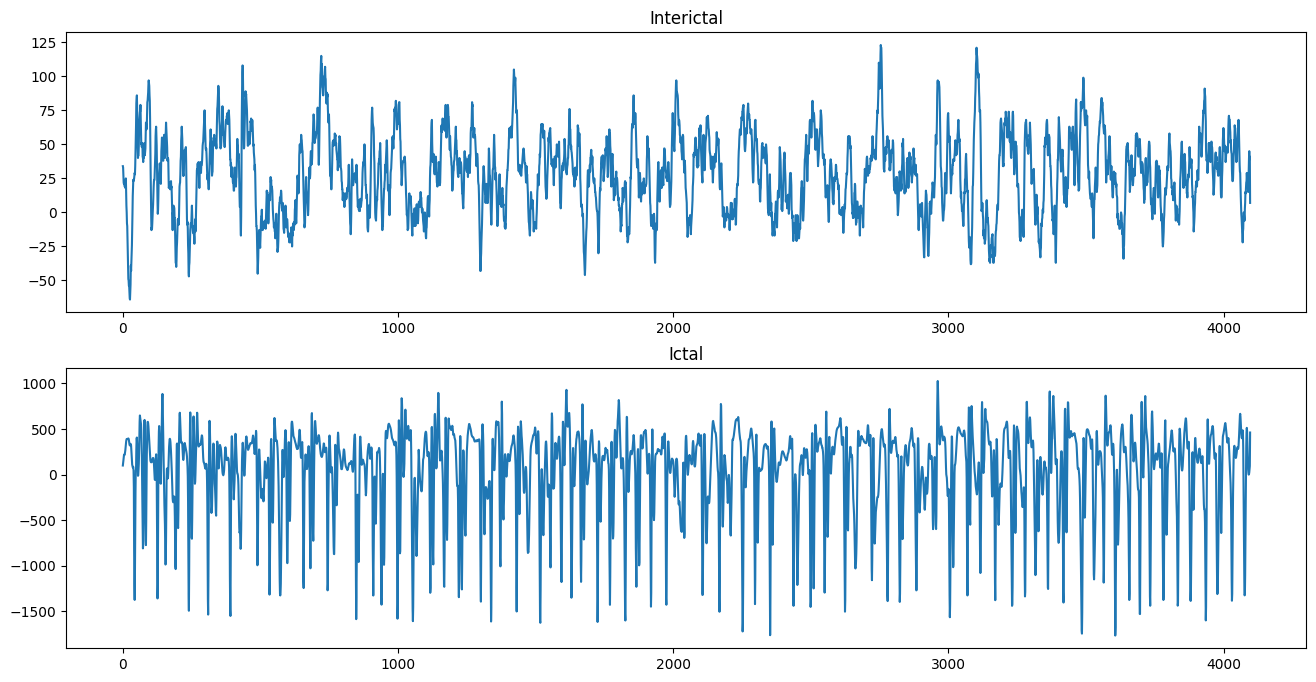

In [13]:
samples=np.arange(0,4097,1)
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title('Interictal')
plt.plot(samples,matD[:,0],label='Interictal')
plt.subplot(2,1,2)
plt.title('Ictal')
plt.plot(samples,matE[:,0],label='Ictal')
plt.show()

In [14]:
feature_size = 8
columns_name = list()
for i in range(feature_size):
    columns_name = columns_name + ['f'+str(i+1)]
columns_name = columns_name + ['class']

In [15]:
def features(mat):
  Fs   = 173
  fft = np.fft.fft(mat)
  mat = np.fft.ifft(fft[0:1500])
  mat = abs(np.fft.ifft(fft[0:1000]))
  lis = list()
  lis = lis + [np.max(abs(fft))]
  lis = lis + [np.min(abs(fft))]
  lis = lis + [np.mean(abs(fft))]
  lis = lis + [np.std(abs(fft))]
  lis = lis + [np.max(mat)]
  lis = lis + [np.min(mat)]
  lis = lis + [np.mean(mat)]
  lis = lis + [np.std(mat)]
  sleep(0.01)
             
  return lis

In [16]:
MftD = np.zeros((100,feature_size + 1))

for i in range(100):
    MftD[i,:] = features(matD[:,i]) + [0]

In [17]:
MftE = np.zeros((100,feature_size + 1))

for i in range(100):
    MftE[i,:] = features(matE[:,i]) + [1]

In [18]:
len(MftD),len(MftE)

(100, 100)

In [19]:
FCM_D = pd.DataFrame(MftD,columns=columns_name)
FCM_E = pd.DataFrame(MftE,columns=columns_name)

In [20]:
TotalDataset = pd.concat([FCM_D,FCM_E],ignore_index=True)

In [21]:
TotalDataset

f1         f2            f3            f4           f5  \
0    117053.000000   7.200045    761.277474   2474.221010   300.608708   
1    130196.000000   8.000708   2762.768379   8336.409952  1973.973964   
2    102490.000000  10.898613   1772.014880   4542.903176   555.116705   
3    144428.000000   3.822670    962.801206   3165.257310   429.678039   
4     63711.000000   4.639733   2397.813626   4934.202754   851.400738   
..             ...        ...           ...           ...          ...   
195  182731.000000   4.140197   2964.034370   6900.671072   949.526909   
196  405933.567827  23.829796  12451.110052  33118.177387  3365.057684   
197  206553.768555  13.807308   7000.972903  17431.403312  1554.877011   
198  186015.216714  22.248840  12069.225734  21179.101425  3292.508700   
199  128700.862108  12.661965   6980.974726  15056.067510  2296.802283   

             f6           f7          f8  class  
0      8.923225   132.549100   54.657462    0.0  
1      7.621243   304.299024  271.771222    0.0  
2      7.765078   209.375622  100.340277    0.0  
3      6.542232   166.508797   71.467323    0.0  
4      5.001954   223.272220  117.290613    0.0  
..          ...          ...         ...    ...  
195    7.628541   321.787517  169.284739    1.0  
196  584.042975  1497.708540  566.344367    1.0  
197   70.801519   785.302431  325.527149    1.0  
198   22.389188   897.583539  643.899324    1.0  
199   30.885310   673.746341  331.607715    1.0  

[200 rows x 9 columns]

In [22]:
X = TotalDataset[columns_name[:-1]]
Y = TotalDataset[['class']]
X = np.asarray(X)
Y = np.asarray(Y)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [24]:
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 8)
(40, 8)
(160, 1)
(40, 1)


In [26]:
x_train=X_train.reshape(X_train.shape[0],8,1)
y_train=Y_train.reshape(Y_train.shape[0],1)
x_test=X_test.reshape(X_test.shape[0],8,1)
y_test=Y_test.reshape(Y_test.shape[0],1)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 8, 1)
(40, 8, 1)
(160, 1)
(40, 1)


In [28]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [29]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(5, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [30]:
input_shape = x_train.shape[1:]

In [31]:
x_train.shape[1:]

(8, 1)

In [32]:
model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.3,
    dropout=0.3,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)]

history=model.fit(x_train,y_train,validation_split=0.2,epochs=200,batch_size=2,callbacks=callbacks,)

score=model.evaluate(x_test,y_test,batch_size=2)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8, 1)]               0         []                            
                                                                                                  
 layer_normalization (Layer  (None, 8, 1)                 2         ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention (Mult  (None, 8, 1)                 7169      ['layer_normalization[0][0]', 
 iHeadAttention)                                                     'layer_normalization[0][0]'] 
                                                                                              

                                                                    ']                            
                                                                                                  
 layer_normalization_6 (Lay  (None, 8, 1)                 2         ['tf.__operators__.add_5[0][0]
 erNormalization)                                                   ']                            
                                                                                                  
 multi_head_attention_3 (Mu  (None, 8, 1)                 7169      ['layer_normalization_6[0][0]'
 ltiHeadAttention)                                                  , 'layer_normalization_6[0][0]
                                                                    ']                            
                                                                                                  
 dropout_6 (Dropout)         (None, 8, 1)                 0         ['multi_head_attention_3[0][0]
          

Epoch 23/200
64/64 [==============================] - 0s 7ms/step - loss: 0.6080 - sparse_categorical_accuracy: 0.7500 - val_loss: 0.5332 - val_sparse_categorical_accuracy: 0.7500
Epoch 24/200
64/64 [==============================] - 0s 7ms/step - loss: 0.6661 - sparse_categorical_accuracy: 0.7188 - val_loss: 0.5295 - val_sparse_categorical_accuracy: 0.7500
Epoch 25/200
64/64 [==============================] - 1s 8ms/step - loss: 0.6305 - sparse_categorical_accuracy: 0.7109 - val_loss: 0.5204 - val_sparse_categorical_accuracy: 0.7500
Epoch 26/200
64/64 [==============================] - 0s 7ms/step - loss: 0.6662 - sparse_categorical_accuracy: 0.6953 - val_loss: 0.5205 - val_sparse_categorical_accuracy: 0.7500
Epoch 27/200
64/64 [==============================] - 1s 8ms/step - loss: 0.6198 - sparse_categorical_accuracy: 0.7344 - val_loss: 0.5180 - val_sparse_categorical_accuracy: 0.7500
Epoch 28/200
64/64 [==============================] - 1s 8ms/step - loss: 0.6413 - sparse_categorica

64/64 [==============================] - 0s 7ms/step - loss: 0.3424 - sparse_categorical_accuracy: 0.8594 - val_loss: 0.3233 - val_sparse_categorical_accuracy: 0.8438
Epoch 69/200
64/64 [==============================] - 0s 7ms/step - loss: 0.3371 - sparse_categorical_accuracy: 0.8750 - val_loss: 0.3260 - val_sparse_categorical_accuracy: 0.8438
Epoch 70/200
64/64 [==============================] - 0s 6ms/step - loss: 0.3245 - sparse_categorical_accuracy: 0.8828 - val_loss: 0.3169 - val_sparse_categorical_accuracy: 0.8438
Epoch 71/200
64/64 [==============================] - 0s 7ms/step - loss: 0.3130 - sparse_categorical_accuracy: 0.8984 - val_loss: 0.3111 - val_sparse_categorical_accuracy: 0.8750
Epoch 72/200
64/64 [==============================] - 0s 6ms/step - loss: 0.3043 - sparse_categorical_accuracy: 0.8906 - val_loss: 0.3082 - val_sparse_categorical_accuracy: 0.8750
Epoch 73/200
64/64 [==============================] - 1s 8ms/step - loss: 0.3321 - sparse_categorical_accuracy: 0

64/64 [==============================] - 0s 6ms/step - loss: 0.2219 - sparse_categorical_accuracy: 0.8984 - val_loss: 0.2550 - val_sparse_categorical_accuracy: 0.8750
Epoch 114/200
64/64 [==============================] - 0s 5ms/step - loss: 0.2070 - sparse_categorical_accuracy: 0.9141 - val_loss: 0.2550 - val_sparse_categorical_accuracy: 0.8750
Epoch 115/200
64/64 [==============================] - 0s 6ms/step - loss: 0.2229 - sparse_categorical_accuracy: 0.9141 - val_loss: 0.2544 - val_sparse_categorical_accuracy: 0.8750
Epoch 116/200
64/64 [==============================] - 0s 6ms/step - loss: 0.2241 - sparse_categorical_accuracy: 0.8906 - val_loss: 0.2524 - val_sparse_categorical_accuracy: 0.8438
Epoch 117/200
64/64 [==============================] - 0s 6ms/step - loss: 0.2289 - sparse_categorical_accuracy: 0.9062 - val_loss: 0.2554 - val_sparse_categorical_accuracy: 0.8750
Epoch 118/200
64/64 [==============================] - 0s 6ms/step - loss: 0.2063 - sparse_categorical_accura

64/64 [==============================] - 0s 6ms/step - loss: 0.1889 - sparse_categorical_accuracy: 0.8984 - val_loss: 0.2406 - val_sparse_categorical_accuracy: 0.8750
Epoch 159/200
64/64 [==============================] - 0s 6ms/step - loss: 0.1710 - sparse_categorical_accuracy: 0.9297 - val_loss: 0.2411 - val_sparse_categorical_accuracy: 0.8750
Epoch 160/200
64/64 [==============================] - 0s 6ms/step - loss: 0.1736 - sparse_categorical_accuracy: 0.9375 - val_loss: 0.2405 - val_sparse_categorical_accuracy: 0.8750
Epoch 161/200
64/64 [==============================] - 0s 6ms/step - loss: 0.1759 - sparse_categorical_accuracy: 0.9219 - val_loss: 0.2400 - val_sparse_categorical_accuracy: 0.8750
Epoch 162/200
64/64 [==============================] - 0s 6ms/step - loss: 0.1869 - sparse_categorical_accuracy: 0.8984 - val_loss: 0.2404 - val_sparse_categorical_accuracy: 0.8750
Epoch 163/200
64/64 [==============================] - 0s 6ms/step - loss: 0.1818 - sparse_categorical_accura

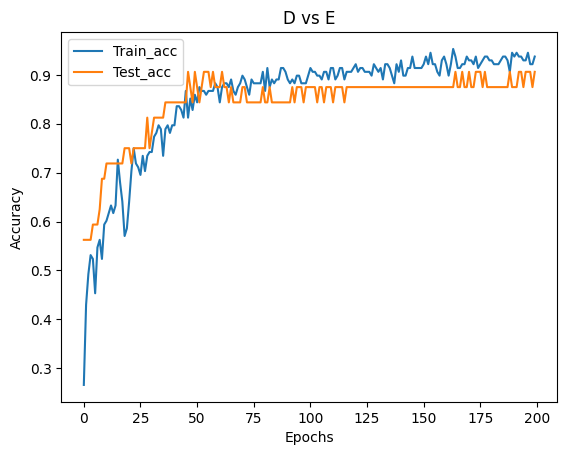

In [33]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('D vs E')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train_acc','Test_acc'],loc='best')
plt.show()

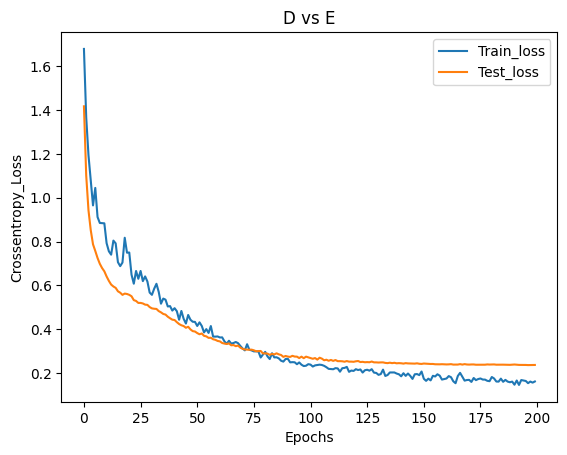

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('D vs E')
plt.xlabel('Epochs')
plt.ylabel('Crossentropy_Loss')
plt.legend(['Train_loss','Test_loss'],loc='best')
plt.show()

In [35]:
clf = SVC(random_state=0)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

C:\Users\Sandeep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [37]:
print('Precision: %.3f' % precision_score(Y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions))

Precision: 1.000
Recall: 0.909
Accuracy: 0.950
F1 Score: 0.952


In [38]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=4)
print('Test score:', score)
print('Test accuracy:', acc)

10/10 [==============================] - 0s 4ms/step - loss: 0.1029 - sparse_categorical_accuracy: 1.0000
Test score: 0.10289186239242554
Test accuracy: 1.0
